#example 1


In [21]:
#note : this requires the pillow package to be installed
#importing libraries
%matplotlib inline
import matplotlib.pyplot as plt
#for plot styling
import seaborn as sns;sns.set()
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin 

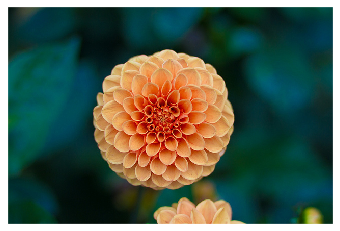

In [22]:
#load dataset
from sklearn.datasets import load_sample_image
china=load_sample_image("flower.jpg")
ax=plt.axes(xticks=[],yticks=[])
ax.imshow(china);

In [23]:
#shpae of the image
china.shape

(427, 640, 3)

In [24]:
china #matrix with pixel values

array([[[ 2, 19, 13],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 1, 77, 64],
        [ 0, 76, 64],
        [ 0, 75, 63]],

       [[ 1, 18, 12],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 0, 76, 64],
        [ 1, 74, 65],
        [ 1, 74, 65]],

       [[ 2, 17, 12],
        [ 6, 19, 12],
        [ 7, 20, 13],
        ...,
        [ 1, 74, 65],
        [ 1, 74, 67],
        [ 1, 74, 67]],

       ...,

       [[ 0, 46, 40],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 5, 44, 26],
        [ 6, 43, 26],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 6, 45, 27],
        [ 7, 44, 27],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 0, 46, 36],
        ...,
        [ 7, 46, 28],
        [ 8, 45, 28],
        [ 9, 43, 27]]], dtype=uint8)

In [25]:
#normalization
data=china/255.0 #gray scale image
data=data.reshape(427*640,3)
data.shape


(273280, 3)

In [26]:
data

array([[0.00784314, 0.0745098 , 0.05098039],
       [0.01176471, 0.07058824, 0.05098039],
       [0.02745098, 0.07843137, 0.05098039],
       ...,
       [0.02745098, 0.18039216, 0.10980392],
       [0.03137255, 0.17647059, 0.10980392],
       [0.03529412, 0.16862745, 0.10588235]])

In [36]:
#original distribution of the color
def plot_pixels(data,title,colors=None,N=1000):
    if colors is None:
        colors=data
    #choose a random subset
    rng=np.random.RandomState(0)
    i=rng.permutation(data.shape[0])[:N]
    colors=colors[i]
    R,G,B=data[i].T
    fig,ax=plt.subplots(1,2,figsize=(16,6))
    ax[0].scatter(R,G,color=colors,marker='.')
    ax[0].set(xlabel='Red',ylabel='Green',xlim=(0,1),ylim=(0,1))
    
    ax[1].scatter(R,B,color=colors,marker='.')
    ax[1].set(xlabel='Red',ylabel='Blue',xlim=(0,1),ylim=(0,1))
    fig.suptitle(title,size=20);
    

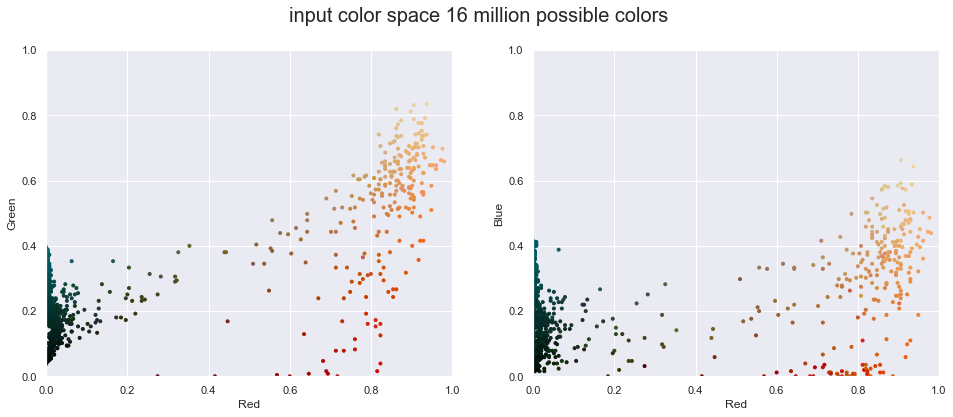

In [37]:
plot_pixels(data,title='input color space 16 million possible colors')

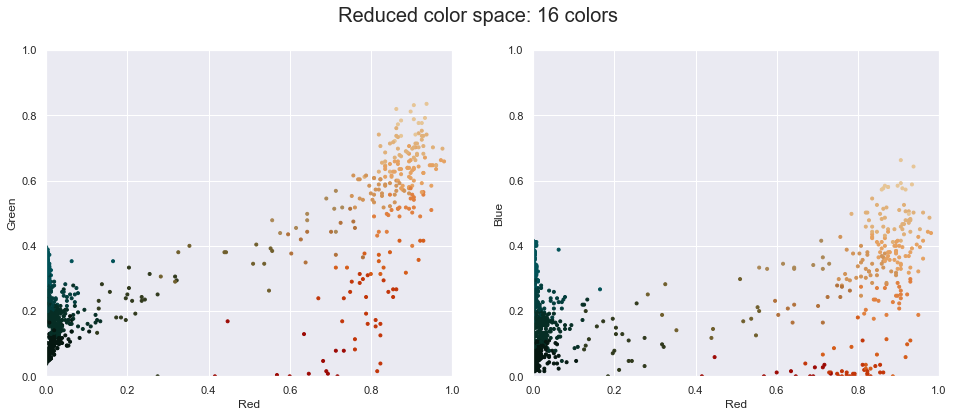

In [39]:
import warnings; warnings.simplefilter('ignore') #fix numpy issue
from sklearn.cluster import MiniBatchKMeans # works on a smaller batch
kmeans=MiniBatchKMeans(16)
kmeans.fit(data)
new_colors=kmeans.cluster_centers_[kmeans.predict(data)]
plot_pixels(data,colors=new_colors,title='Reduced color space: 16 colors')

Text(0.5, 1.0, '16-color Image')

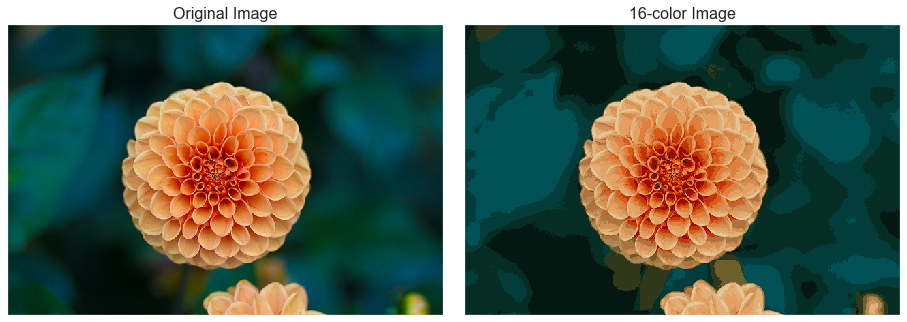

In [43]:
china_recolored=new_colors.reshape(china.shape)
fig,ax = plt.subplots(1,2,figsize=(16,6), subplot_kw=dict(xticks=[],yticks=[]))
                   
fig.subplots_adjust(wspace=.05)
ax[0].imshow(china)
ax[0].set_title('Original Image',size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image',size=16)


#example 2

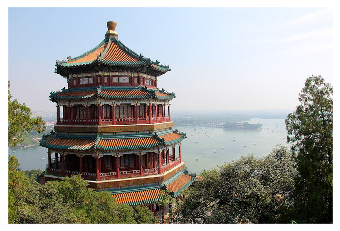

In [44]:
china=load_sample_image('china.jpg')
ax=plt.axes(xticks=[],yticks=[])
ax.imshow(china)

In [45]:
china.shape

(427, 640, 3)

In [46]:
china

array([[[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [250, 251, 255],
        [250, 251, 255],
        [250, 251, 255]],

       [[172, 199, 229],
        [173, 200, 230],
        [173, 200, 230],
        ...,
        [251, 252, 255],
        [251, 252, 255],
        [251, 252, 255]],

       [[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [252, 253, 255],
        [252, 253, 255],
        [252, 253, 255]],

       ...,

       [[ 88,  80,   7],
        [147, 138,  69],
        [122, 116,  38],
        ...,
        [ 39,  42,  33],
        [  8,  14,   2],
        [  6,  12,   0]],

       [[122, 112,  41],
        [129, 120,  53],
        [118, 112,  36],
        ...,
        [  9,  12,   3],
        [  9,  15,   3],
        [ 16,  24,   9]],

       [[116, 103,  35],
        [104,  93,  31],
        [108, 102,  28],
        ...,
        [ 43,  49,  39],
        [ 13,  21,   6],
        [ 15,  24,   7]]

In [47]:
##normalization
data=china/255.0 #gray scale image
data=data.reshape(427*640,3)
data.shape

(273280, 3)

In [48]:
data

array([[0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       ...,
       [0.16862745, 0.19215686, 0.15294118],
       [0.05098039, 0.08235294, 0.02352941],
       [0.05882353, 0.09411765, 0.02745098]])

In [49]:
#original distribution of the color
def plot_pixels(data,title,colors=None,N=1000):
    if colors is None:
        colors=data
    #choose a random subset
    rng=np.random.RandomState(0)
    i=rng.permutation(data.shape[0])[:N]
    colors=colors[i]
    R,G,B=data[i].T
    fig,ax=plt.subplots(1,2,figsize=(16,6))
    ax[0].scatter(R,G,color=colors,marker='.')
    ax[0].set(xlabel='Red',ylabel='Green',xlim=(0,1),ylim=(0,1))
    
    ax[1].scatter(R,B,color=colors,marker='.')
    ax[1].set(xlabel='Red',ylabel='Blue',xlim=(0,1),ylim=(0,1))
    fig.suptitle(title,size=20);
    

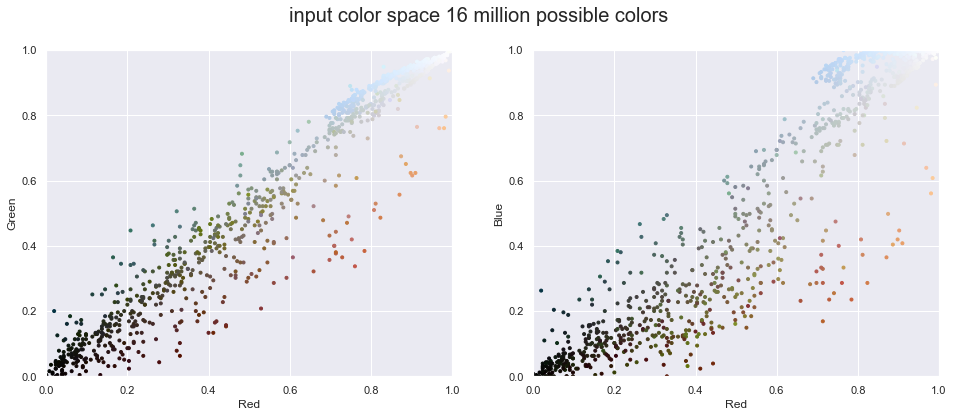

In [50]:
plot_pixels(data,title='input color space 16 million possible colors')

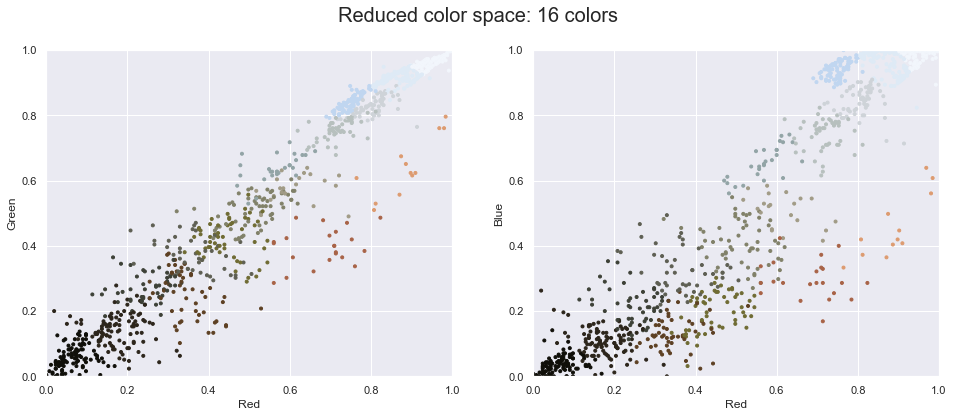

In [51]:
import warnings; warnings.simplefilter('ignore') #fix numpy issue
from sklearn.cluster import MiniBatchKMeans # works on a smaller batch
kmeans=MiniBatchKMeans(16)
kmeans.fit(data)
new_colors=kmeans.cluster_centers_[kmeans.predict(data)]
plot_pixels(data,colors=new_colors,title='Reduced color space: 16 colors')

Text(0.5, 1.0, '16-color Image')

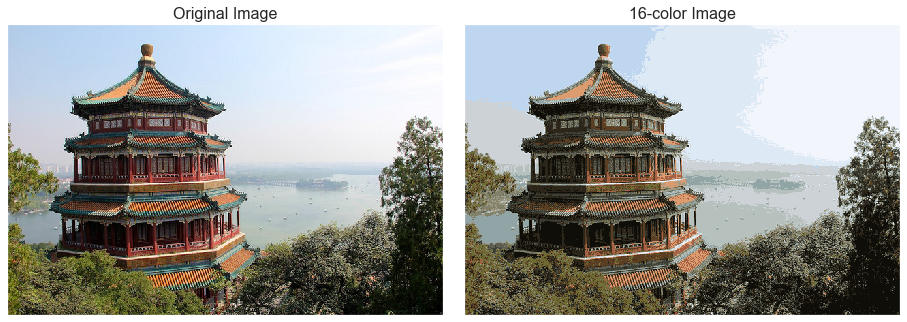

In [52]:
china_recolored=new_colors.reshape(china.shape)
fig,ax = plt.subplots(1,2,figsize=(16,6), subplot_kw=dict(xticks=[],yticks=[]))
                   
fig.subplots_adjust(wspace=.05)
ax[0].imshow(china)
ax[0].set_title('Original Image',size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image',size=16)
